In [1]:
!git clone https://github.com/cjlin1/libsvm.git

Cloning into 'libsvm'...
remote: Enumerating objects: 4201, done.
remote: Counting objects: 100% (232/232), done.
remote: Compressing objects: 100% (113/113), done.
Receiving objects: 100% (4201/4201), 9.91 MiB | 10.00 KiB/s, done.
remote: Total 4201 (delta 142), reused 119 (delta 119), pack-reused 3969 (from 3)
Resolving deltas: 100% (2318/2318), done.


In [4]:
%cd libsvm
!make

/Users/tranhoangkimngan/CQ2022/25-26/HK1-2526/Lập trình song song/Project/train_svm/libsvm
make: Nothing to be done for `all'.


## Visualize Confusion Matrix:

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Hàm đọc nhãn thực tế từ file dữ liệu LibSVM (test_svm.txt)
def read_true_labels(filename):
    y_true = []
    with open(filename, 'r') as f:
        for line in f:
            # Format LibSVM là: <label> <index1>:<value1> ... => lấy phần tử đầu. 
            label = float(line.strip().split()[0])
            y_true.append(label)
    return y_true

# Hàm đọc nhãn dự đoán từ file output của svm-predict (pred.txt)
def read_pred_labels(filename):
    y_pred = []
    with open(filename, 'r') as f:
        for line in f:
            # File này chỉ chứa 1 cột nhãn dự đoán
            y_pred.append(float(line.strip()))
    return y_pred

def visualize_confusion_matrix(test_file, pred_file, version_label=""):
    try:
        y_true = read_true_labels(test_file)
        y_pred = read_pred_labels(pred_file)

        # Kiểm tra xem số lượng dòng có khớp nhau không
        if len(y_true) != len(y_pred):
            print(f"Cảnh báo: Số lượng nhãn không khớp! True: {len(y_true)}, Pred: {len(y_pred)}")
        else:
            # Tính toán Ma trận nhầm lẫn
            cm = confusion_matrix(y_true, y_pred)
            plt.figure(figsize=(8, 6))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
            
            plt.title(f'Confusion Matrix for {version_label}')
            plt.ylabel('True Label')
            plt.xlabel('Predicted Label')
            plt.show()

    except FileNotFoundError as e:
        print(f"Lỗi: Không tìm thấy file. Hãy kiểm tra lại đường dẫn. {e}")

## CPU:

In [23]:
!./svm-train -s 0 -t 0 -c 1.0 \
  "../cpu/train_svm.txt" \
  ../cpu/model_ae_svm

....*..*
optimization finished, #iter = 6326
nu = 0.186455
obj = -248.087602, rho = -5.891874
nSV = 567, nBSV = 215
.....*...*
optimization finished, #iter = 8083
nu = 0.462488
obj = -700.864259, rho = 2.639464
nSV = 1135, nBSV = 753
....*..*
optimization finished, #iter = 6363
nu = 0.182762
obj = -232.519898, rho = -4.522161
nSV = 564, nBSV = 213
.....*...*
optimization finished, #iter = 8573
nu = 0.431890
obj = -665.358703, rho = 4.183952
nSV = 1090, nBSV = 709
.....*..*
optimization finished, #iter = 7714
nu = 0.287030
obj = -398.936612, rho = -0.991499
nSV = 794, nBSV = 403
...*.*
optimization finished, #iter = 4394
nu = 0.144865
obj = -206.092331, rho = -1.780680
nSV = 429, nBSV = 195
......*...*
optimization finished, #iter = 9517
nu = 0.460502
obj = -717.452594, rho = 1.666113
nSV = 1157, nBSV = 748
.....*...*
optimization finished, #iter = 8333
nu = 0.368696
obj = -523.397511, rho = 0.139946
nSV = 930, nBSV = 536
...*..*
optimization finished, #iter = 5228
nu = 0.161181
obj = -

In [24]:
!./svm-predict \
  "../cpu/test_svm.txt" \
  ../cpu/model_ae_svm \
  "../cpu/pred.txt"

Accuracy = 56.65% (1133/2000) (classification)


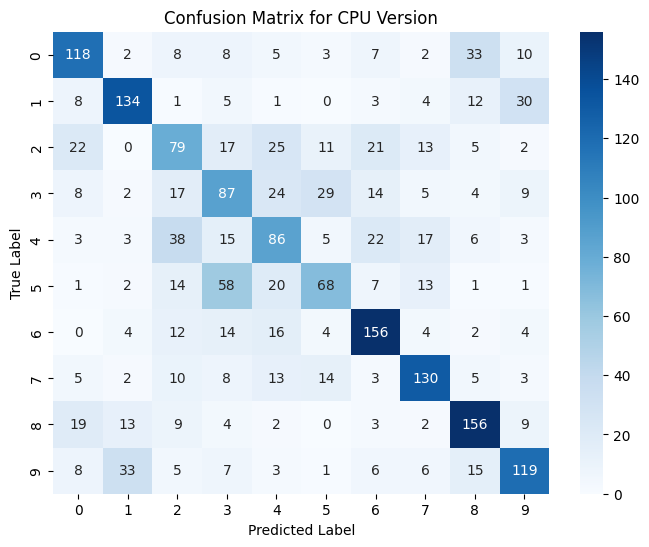

In [25]:
test_file_cpu = "../cpu/test_svm.txt"
pred_file_cpu = "../cpu/pred.txt"
visualize_confusion_matrix(test_file_cpu, pred_file_cpu, version_label="CPU Version")

## GPU Naive:

In [14]:
!./svm-train -s 0 -t 0 -c 1.0 \
  "../naive/train_svm.txt" \
  ../naive/model_ae_svm

..............................................................*............................*
optimization finished, #iter = 90549
nu = 0.138299
obj = -964.668301, rho = -5.166774
nSV = 1896, nBSV = 969
..................................................................................................*................................................*
optimization finished, #iter = 146118
nu = 0.359673
obj = -2821.359361, rho = 7.443129
nSV = 4194, nBSV = 3033
.......................................................*..........................*
optimization finished, #iter = 81485
nu = 0.121112
obj = -840.219684, rho = -3.014574
nSV = 1695, nBSV = 824
...................................................................................*...............................................*
optimization finished, #iter = 130862
nu = 0.351992
obj = -2825.785735, rho = 8.608657
nSV = 4093, nBSV = 2976
................................................................................*....................

In [15]:
!./svm-predict \
  "../naive/test_svm.txt" \
  ../naive/model_ae_svm \
  "../naive/pred.txt"

Accuracy = 63.63% (6363/10000) (classification)


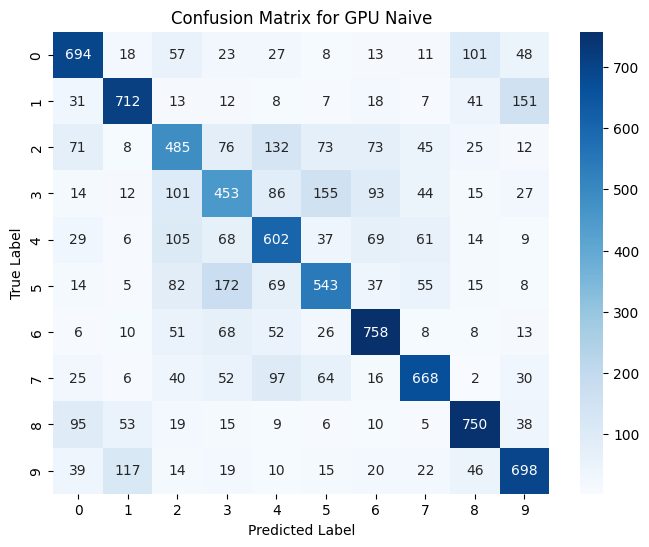

In [20]:
test_file_gpu_naive = "../naive/test_svm.txt"
pred_file_gpu_naive = "../naive/pred.txt"
visualize_confusion_matrix(test_file_gpu_naive, pred_file_gpu_naive, version_label="GPU Naive")

## GPU Optimization Version 1:

In [12]:
!./svm-train -s 0 -t 0 -c 1.0 \
  "../opt1/train_svm.txt" \
  ../opt1/model_ae_svm

.......................................................................*....................................*
optimization finished, #iter = 107097
nu = 0.147339
obj = -1036.269059, rho = -1.782314
nSV = 2012, nBSV = 1030
..........................................................................................................*...................................................*
optimization finished, #iter = 157275
nu = 0.354947
obj = -2762.719341, rho = 7.013201
nSV = 4164, nBSV = 2978
....................................................................*.................................*
optimization finished, #iter = 101798
nu = 0.127016
obj = -876.033632, rho = -0.842590
nSV = 1789, nBSV = 839
.......................................................................................................*..................................................*
optimization finished, #iter = 153562
nu = 0.347002
obj = -2794.498137, rho = 6.145997
nSV = 4073, nBSV = 2920
..........................

In [13]:
!./svm-predict \
  "../opt1/test_svm.txt" \
  ../opt1/model_ae_svm \
  "../opt1/pred.txt"

Accuracy = 63.96% (6396/10000) (classification)


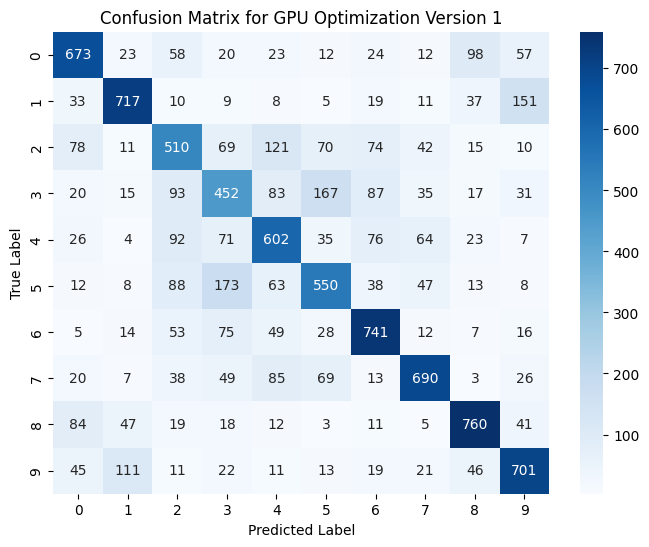

In [21]:
test_file_gpu_opt1 = "../opt1/test_svm.txt"
pred_file_gpu_opt1 = "../opt1/pred.txt"
visualize_confusion_matrix(test_file_gpu_opt1, pred_file_gpu_opt1, version_label="GPU Optimization Version 1")

## GPU Optimization Version 2:

In [ ]:
!./svm-train -s 0 -t 0 -c 1.0 \
  "../opt2/train_svm.txt" \
  ../opt2/model_ae_svm

........................................................*..........................*
optimization finished, #iter = 82661
nu = 0.142815
obj = -996.699818, rho = -4.346545
nSV = 1987, nBSV = 970
...................................................................................*.....................................*
optimization finished, #iter = 120437
nu = 0.374457
obj = -2925.050706, rho = 5.204316
nSV = 4362, nBSV = 3171
..................................................*......................*
optimization finished, #iter = 72478
nu = 0.127997
obj = -873.336632, rho = -2.796617
nSV = 1789, nBSV = 852
...........................................................................*....................................*
optimization finished, #iter = 111633
nu = 0.354931
obj = -2843.637150, rho = 6.829609
nSV = 4134, nBSV = 2991
.........................................................................*...................................*
optimization finished, #iter = 108835
nu = 0.197824


In [ ]:
!./svm-predict \
  "../opt2/test_svm.txt" \
  ../opt2/model_ae_svm \
  "../opt2/pred.txt"

Accuracy = 64.25% (6425/10000) (classification)


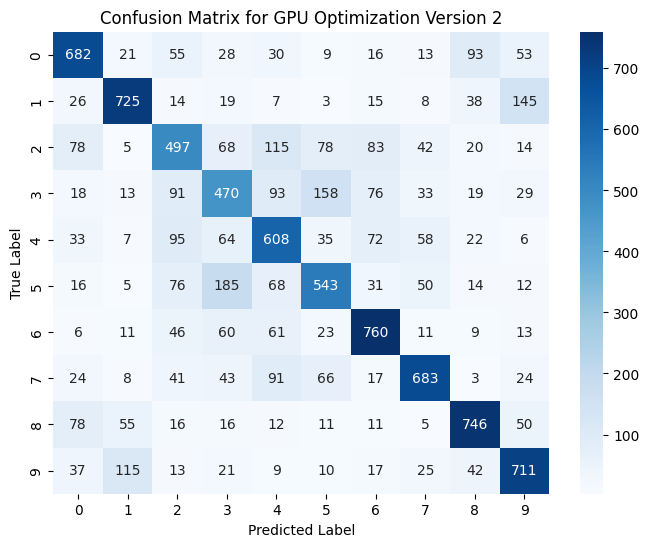

In [22]:
test_file_gpu_opt2 = "../opt2/test_svm.txt"
pred_file_gpu_opt2 = "../opt2/pred.txt"
visualize_confusion_matrix(test_file_gpu_opt2, pred_file_gpu_opt2, version_label="GPU Optimization Version 2")